In [ ]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# # fontprop = fm.FontProperties(fname=font_path, size=10)
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False

font_path='/System/Library/Fonts/AppleGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

샘플 shape: (15, 32, 32, 3), 레이블 shape: (15,)


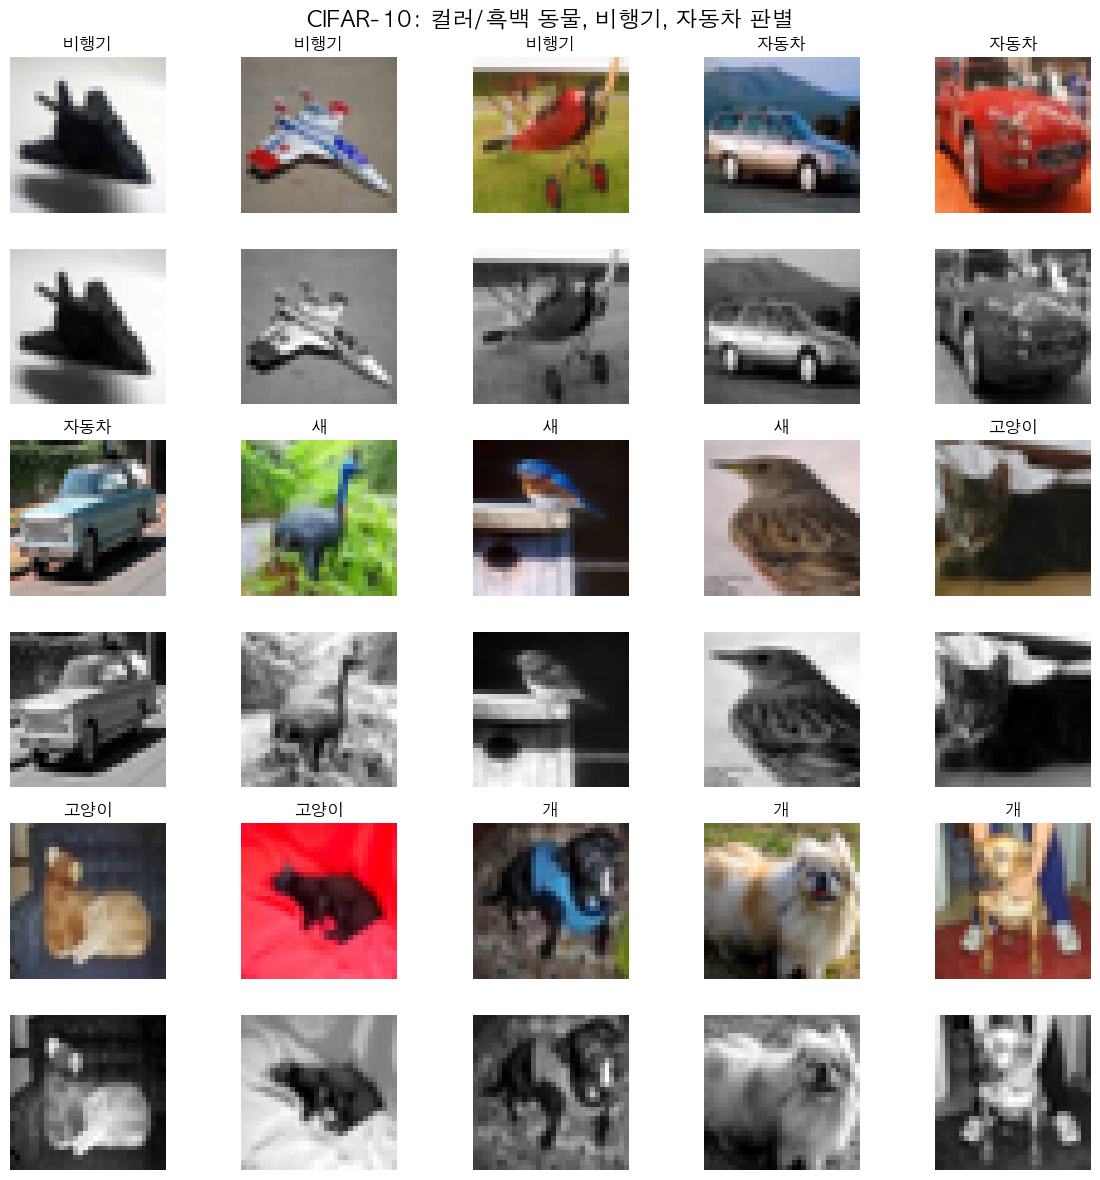

In [17]:
# CIFAR-10 클래스 이름
class_names = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

# 동물(2=새, 3=고양이, 5=개), 비행기(0), 자동차(1) 인덱스만 필터
target_labels = [0, 1, 2, 3, 5]

# 1. 데이터 불러오기
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()  # (50000,)으로 차원 축소

# 2. 각 클래스별로 3장씩 추출 (동물: 새, 고양이, 개 / 비행기 / 자동차)
samples_per_class = 3
imgs = []
labels = []

for label in target_labels:
    idx = np.where(y_train == label)[0][:samples_per_class]
    imgs.extend(x_train[idx])
    labels.extend([label]*samples_per_class)

imgs = np.array(imgs)
labels = np.array(labels)

print(f"샘플 shape: {imgs.shape}, 레이블 shape: {labels.shape}")

# 3. 흑백(Grayscale)로 변환
imgs_gray = tf.image.rgb_to_grayscale(imgs)  # (15, 32, 32, 1)

# 4. 컬러/흑백 이미지와 클래스 이름을 함께 시각화
plt.figure(figsize=(12, 12)) # Adjusted figure size for more rows

img_index = 0
for sample_idx in range(samples_per_class):
    for class_idx, label in enumerate(target_labels):
        # Color image
        color_subplot_idx = (sample_idx * 2) * len(target_labels) + class_idx + 1
        plt.subplot(samples_per_class * 2, len(target_labels), color_subplot_idx)
        plt.imshow(imgs[img_index])
        plt.title(class_names[labels[img_index]])
        plt.axis('off')
        if class_idx == 0:
            plt.ylabel(f'Sample {sample_idx+1}\n컬러', fontsize=12, labelpad=10)

        # Grayscale image
        gray_subplot_idx = (sample_idx * 2 + 1) * len(target_labels) + class_idx + 1
        plt.subplot(samples_per_class * 2, len(target_labels), gray_subplot_idx)
        plt.imshow(imgs_gray[img_index].numpy().squeeze(), cmap='gray')
        plt.axis('off')
        if class_idx == 0:
            plt.ylabel(f'Sample {sample_idx+1}\n흑백', fontsize=12, labelpad=10)

        img_index += 1


plt.suptitle("CIFAR-10: 컬러/흑백 동물, 비행기, 자동차 판별", fontsize=16) 
# , fontproperties=fontprop
plt.tight_layout()
plt.show()